In [1]:
using Gnuplot
using DataFrames 
using CSV 
using Statistics

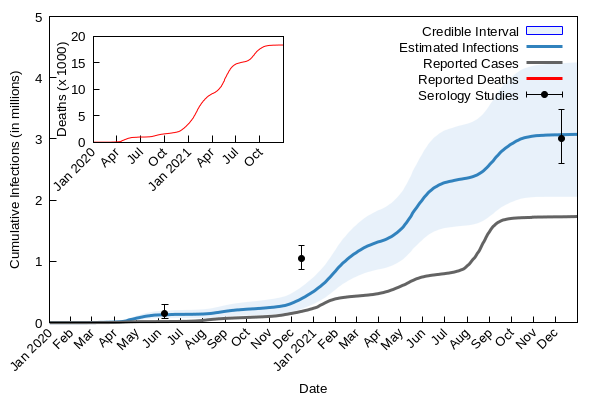

In [286]:
casedata = CSV.File("data/DataJapan.csv") |> DataFrame
simdata = CSV.File("output/simulation_output_totalinfections_time.csv", header= false) |> DataFrame
rename!(simdata, ["t$i" for i = 1:729])
#simdata = DataFrame([[names(simdata)]; collect.(eachrow(simdata))], [:time; Symbol.(axes(simdata, 1))])
#rename!(simdata, ["time", ["sim$i" for i = 1:1000]...])
#select!(simdata, Not(:time))

#mat_df = Matrix(simdata)
#vec(mean(mat_df, dims=2))

lows = zeros(729) 
his = zeros(729) 
means = zeros(729) 
for i = 1:729 
    means[i] = mean(simdata[:, "t$i"])
    lows[i], his[i] = quantile(simdata[:, "t$i"], [0.10, 0.90])
end
#mean(simdata[:, "t1"])

xvals = 1:729
Gnuplot.options.mime[MIME"text/html"] = "svg enhanced standalone mouse size 800,400"; # set a default Gnuplot/Jupyter set size here 
@gp "reset" 
@gp :- "set multiplot"
@gp :- "set xlabel 'Date'"
@gp :- "set yrange [0:5]"
@gp :- "set boxwidth 0.2"
@gp :- "set ylabel 'Cumulative Infections (in millions)'"

#@gp :- "set xtics('Jan 16 2020' 1 'Feb' 17, 'Mar' 46, 'Apr' 77, 'May' 107, 'Jun' 138, 'Jul' 168, 'Aug' 199, 'Sep' 230, 'Oct' 260, 'Nov' 291, 'Dec' 321, 'Jan 2021' 352, 'Feb' 383, 'Mar' 411, 'Apr' 442, 'May' 472, 'Jun' 503, 'Jul' 533, 'Aug' 564, 'Sep' 595, 'Oct' 625, 'Nov' 656, 'Dec' 686, 'Jan' 717)"
@gp :- "set xtics('Jan 2020' 1, 'Feb' 30, 'Mar' 59, 'Apr' 90, 'May' 120, 'Jun' 151, 'Jul' 181, 'Aug' 212, 'Sep' 243, 'Oct' 273, 'Nov' 304, 'Dec' 334, 'Jan 2021' 365, 'Feb' 396, 'Mar' 424, 'Apr' 455, 'May' 485, 'Jun' 516, 'Jul' 546, 'Aug' 577, 'Sep' 608, 'Oct' 638, 'Nov' 669, 'Dec' 699)"
@gp :- "set xtics rotate by 45 right in font ', 10'"
@gp :- "set xtics noenhanced nomirror" # no escaping for strings :-
@gp :- "set ytics nomirror" :-
@gp :- xvals cumsum(lows) ./ 1000000 cumsum(his) ./ 1000000 "with filledcurves title 'Credible Interval' fc rgb '#deebf7' fs solid 0.7 border lc 'blue'"
@gp :- xvals cumsum(means) ./ 1000000 "with lines title 'Estimated Infections' lc rgb '#3182bd' lw 3" 
# with impulse works but there are too many data points
#@gp :- xvals cumsum(casedata.dailyCases) ./ 1000000 "with impulse title 'Reported'  lc 'black' lw 3"
@gp :- xvals cumsum(casedata.dailyCases) ./ 1000000 "with lines title 'Reported Cases' dashtype 1 lc rgb '#636363' lw 3"
@gp :- "plot keyentry w lines lw 3 lc rgb 'red' title 'Reported Deaths'"

# elements denote the serology study
smedians = [151771, 1049754, 3000009] ./ 1000000
smin = [63238, 860039, 2596647] ./ 1000000
smax =  [303543, 1264764, 3479002] ./ 1000000
@gp :- "set boxwidth 4.2"
@gp :- "set style fill solid"

@gp :- 160:160 smedians[1] smin[1] smax[1] "with candlesticks title 'Serology Studies' lt 7 lc 'black'"
@gp :- 348:348 smedians[2] smin[2] smax[2] "with candlesticks notitle whiskerbars lt 7 ps 0.1 lc 'black'"
@gp :- 707:707 smedians[3] smin[3] smax[3] "with candlesticks notitle lt 7 lc 'black'"

@gp :- 2 "set yrange [0:*]"
@gp :- 2 "set ytics 5"
@gp :- 2 "set xtics('Jan 2020' 1,  'Apr' 90,  'Jul' 181, 'Oct' 273, 'Jan 2021' 365, 'Apr' 455,  'Jul' 546, 'Oct' 638)"
@gp :- 2 "set ylabel 'Deaths (x 1000)' off 1.5,0"
@gp :- 2 "unset xlabel" "unset grid" "unset key" 
#@gp :- 2 "set key outside maxcols 2 maxrows 729"
@gp :- 2 "set size 0.45, 0.45"     # set size of inset
@gp :- 2 "set origin 0.06, 0.5"     # move bottom left corner of inset
@gp :- 2 xvals cumsum(casedata.dailyDeaths) ./ 1000 "with lines notitle lc 'red'"
Gnuplot.save(term="pngcairo enhanced font 'Arial,10' size 600,400", output="output/temporal.png")
Gnuplot.save(term="pdfcairo enhanced font 'Arial,14' size 6.0,4.0", output="output/temporal.pdf")
display(@gp)

In [163]:
    using Dates 
    drange_start = Date(2020, 01, 03)
    drange_end = drange_start +  Day(728)
    drange = drange_start : Day(1) : drange_end
    _myxtics_idx = findall(x -> Dates.day(x) == 1, drange)
    _myxtics_months = Dates.monthabbr.(drange[_myxtics_idx])
    myxtics = ""
    for i = 1:length(_myxtics_idx)
        myxtics = string(myxtics, "'$(_myxtics_months[i])' $(_myxtics_idx[i]), ")
    end
    println(myxtics)
    println(drange[end])


'Feb' 30, 'Mar' 59, 'Apr' 90, 'May' 120, 'Jun' 151, 'Jul' 181, 'Aug' 212, 'Sep' 243, 'Oct' 273, 'Nov' 304, 'Dec' 334, 'Jan' 365, 'Feb' 396, 'Mar' 424, 'Apr' 455, 'May' 485, 'Jun' 516, 'Jul' 546, 'Aug' 577, 'Sep' 608, 'Oct' 638, 'Nov' 669, 'Dec' 699, 
2021-12-31


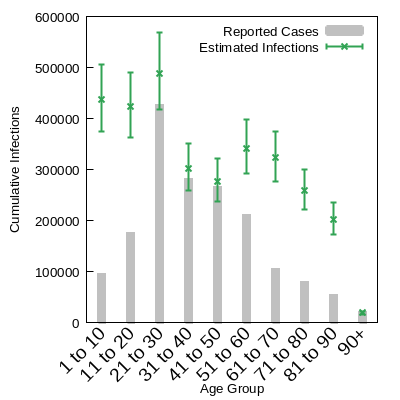

In [288]:
# plt the age specfic stuff 
ag = CSV.File("output/simulation_output_totalinfections_ages.csv", header=false) |> DataFrame
rename!(ag, ["ag$i" for i = 1:100])

mag = Matrix(ag)
means = vec(mean(mag, dims=1))
lows = quantile.([mag[:, i] for i = 1:100], 0.10)
his = quantile.([mag[:, i] for i = 1:100], 0.90)

# reshape 
means_r, lows_r, highs_r = reshape.([means, lows, his], Ref((10, 10)))
ms, ls, hs = vec.(sum.([means_r, lows_r, highs_r], dims=1))

xvals = 1:10 

rep_infections_age = [94046, 174469,424964,281203,265446,210861,104272,78502, 53922, 20204]

@gp "reset" 
@gp :- "set xlabel 'Age Group'"
#@gp :- "set yrange [0:5]"
@gp :- "set boxwidth 0.2 absolute"
@gp :- "set ylabel 'Cumulative Infections'"
@gp :- "set xtics('1 to 10' 1, '11 to 20' 2, '21 to 30' 3, '31 to 40' 4, '41 to 50' 5, '51 to 60' 6 , '61 to 70' 7, '71 to 80' 8, '81 to 90' 9, '90+' 10)"
@gp :- "set xrange [0.5:10.5]"
@gp :- "set yrange [0:*]"
@gp :- "set xtics rotate by 45 right in font ', 14'"
@gp :- "set xtics noenhanced nomirror" # no escaping for strings :-
@gp :- "set ytics nomirror" 
@gp :- "set style fill solid"
@gp :- xvals rep_infections_age "with boxes title 'Reported Cases' lc 'grey' lw 3"
@gp :- xvals ms ls hs "with candlesticks title 'Estimated Infections' lt 2 lw 2 lc rgb '#31a354' whiskerbars 100"
#@gp :- 348:348 smedians[2] smin[2] smax[2] "with candlesticks notitle whiskerbars lt 7 ps 0.1 lc 'black'"
#@gp :- 707:707 smedians[3] smin[3] smax[3] "with candlesticks notitle lt 7 lc 'grey'"
Gnuplot.save(term="pngcairo enhanced font 'Arial,10' size 400,400", output="output/agegroups.png")
Gnuplot.save(term="pdfcairo enhanced font 'Arial,14' size 4.0,4.0", output="output/agegroups.pdf")
display(@gp)
